In [1]:
# import modules:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning, EDA, Visualizations

In [2]:
# read the json data into pandas dataframe:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
    df = pd.DataFrame(data)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
# check for missing values:
len(df[df.phone.isnull()])

396

In [5]:
# check for missing values:
df[df.isnull().any(axis=1)]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,Android,0.0,False,0.0,3.50,5.0
49985,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,Android,0.0,False,100.0,1.38,5.0
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.00,5.0
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0


In [6]:
df[df.avg_rating_of_driver.isnull()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,Android,0.0,False,0.0,3.50,5.0
49985,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,Android,0.0,False,100.0,1.38,5.0
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.00,5.0
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0


In [7]:
# convert dates to datatime format:
df.signup_date = pd.to_datetime(df.signup_date, yearfirst = True)
df.last_trip_date = pd.to_datetime(df.last_trip_date, yearfirst = True)

In [8]:
# find the date when the data was pulled:
date_now = df.last_trip_date.max()
print(date_now)

2014-07-01 00:00:00


In [9]:
date_now - pd.DateOffset(days=30)

Timestamp('2014-06-01 00:00:00')

In [10]:
# add 'retained' label to the data:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

df['retained'] = np.nan
for i in range(0, len(df)):
    if df.last_trip_date[i] >=  (date_now - pd.DateOffset(days=30)):
        df['retained'][i] = 1
    else:
        df['retained'][i] = 0
df.retained = df.retained.astype(int)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [11]:
# retention by city:
warnings.simplefilter(action="ignore", category=FutureWarning)
df.groupby(['city'])['retained'].agg({'total users':'count',
                                      'retained users': 'sum',
                                      '% retained': lambda x: round(100*x.sum()/x.count(),1)})

,total users,retained users,% retained
city,,,
Astapor,16534,4228,25.6
King's Landing,10130,6363,62.8
Winterfell,23336,8213,35.2


In [12]:
by_city = df.groupby('city').agg({'retained':['count','sum',lambda x: round(100*x.sum()/x.count(),1)],
                        'avg_rating_of_driver':'mean',
                       'avg_surge':'mean',
                       'surge_pct':'mean',
                       'ultimate_black_user':lambda x: round(100*x.sum()/x.count(),1),
                       'weekday_pct':'mean',
                       'trips_in_first_30_days':'mean',
                        'avg_dist': 'mean',
                        'avg_rating_by_driver':'mean'})
by_city.head()

retained                  avg_rating_of_driver avg_surge  \
                  count   sum <lambda_0>                 mean      mean   
city                                                                      
Astapor           16534  4228       25.6             4.630593  1.086522   
King's Landing    10130  6363       62.8             4.706997  1.070707   
Winterfell        23336  8213       35.2             4.532996  1.068194   

                surge_pct ultimate_black_user weekday_pct  \
                     mean            <lambda>        mean   
city                                                        
Astapor         10.140305                39.2   60.370050   
King's Landing   9.966979                41.5   63.232290   
Winterfell       7.449927                35.0   60.318936   

               trips_in_first_30_days  avg_dist avg_rating_by_driver  
                                 mean      mean                 mean  
city                                                                  
Astapor                      1.948651  5.427940             4.798853  
King's Landing               2.463672  5.976596             4.853162  
Winterfell                   2.431179  5.980153             4.730909

In [13]:
df.groupby(['phone']).agg({'retained':['count','sum',lambda x: round(100*x.sum()/x.count(),1)],
                        'avg_rating_of_driver':'mean',
                       'avg_surge':'mean',
                       'surge_pct':'mean',
                       'ultimate_black_user':lambda x: round(100*x.sum()/x.count(),1),
                       'weekday_pct':'mean',
                       'trips_in_first_30_days':'mean',
                        'avg_dist': 'mean',
                        'avg_rating_by_driver':'mean'})

retained                   avg_rating_of_driver avg_surge surge_pct  \
           count    sum <lambda_0>                 mean      mean      mean   
phone                                                                         
Android    15022   3146       20.9             4.627394  1.071718  8.540401   
iPhone     34582  15525       44.9             4.590783  1.076412  9.020797   

        ultimate_black_user weekday_pct trips_in_first_30_days  avg_dist  \
                   <lambda>        mean                   mean      mean   
phone                                                                      
Android                32.1   60.403202               1.934962  5.978743   
iPhone                 39.9   61.092612               2.425944  5.701441   

        avg_rating_by_driver  
                        mean  
phone                         
Android             4.784144  
iPhone              4.775132

In [14]:
df.groupby(['city','phone']).agg({'retained':['count','sum',lambda x: round(100*x.sum()/x.count(),1)],
                        'avg_rating_of_driver':'mean',
                       'avg_surge':'mean',
                        'surge_pct':'mean',          
                       'ultimate_black_user':lambda x: round(100*x.sum()/x.count(),1),
                       'weekday_pct':'mean',
                       'trips_in_first_30_days':'mean',
                        'avg_dist': 'mean',
                        'avg_rating_by_driver':'mean'})

retained                  avg_rating_of_driver  \
                          count   sum <lambda_0>                 mean   
city           phone                                                    
Astapor        Android     5244   645       12.3             4.652832   
               iPhone     11169  3553       31.8             4.619831   
King's Landing Android     2498  1092       43.7             4.737322   
               iPhone      7568  5233       69.1             4.698430   
Winterfell     Android     7280  1409       19.4             4.569310   
               iPhone     15845  6739       42.5             4.516802   

                       avg_surge  surge_pct ultimate_black_user weekday_pct  \
                            mean       mean            <lambda>        mean   
city           phone                                                          
Astapor        Android  1.080948   9.678299                33.0   60.072426   
               iPhone   1.089534  10.388996                41.9   60.466004   
King's Landing Android  1.065500   9.379263                36.5   63.986789   
               iPhone   1.072647  10.191517                43.0   62.907096   
Winterfell     Android  1.067203   7.432898                30.0   59.411827   
               iPhone   1.068962   7.497198                37.0   60.667655   

                       trips_in_first_30_days  avg_dist avg_rating_by_driver  
                                         mean      mean                 mean  
city           phone                                                          
Astapor        Android               1.727307  5.731192             4.817413  
               iPhone                2.049691  5.276887             4.789972  
King's Landing Android               1.935949  6.121769             4.854356  
               iPhone                2.640592  5.897367             4.852389  
Winterfell     Android               2.084203  6.107984             4.735993  
               iPhone                2.588640  5.907125             4.727774

In [15]:
by_city.iloc[:, by_city.columns.get_level_values(1).isin({'<lambda_0>','mean'})]

,retained,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,trips_in_first_30_days,avg_dist,avg_rating_by_driver
,<lambda_0>,mean,mean,mean,mean,mean,mean,mean
city,,,,,,,,
Astapor,25.6,4.630593,1.086522,10.140305,60.370050,1.948651,5.427940,4.798853
King's Landing,62.8,4.706997,1.070707,9.966979,63.232290,2.463672,5.976596,4.853162
Winterfell,35.2,4.532996,1.068194,7.449927,60.318936,2.431179,5.980153,4.730909


In [16]:
by_city.columns.get_level_values(1)

Index(['count', 'sum', '<lambda_0>', 'mean', 'mean', 'mean', '<lambda>',
       'mean', 'mean', 'mean', 'mean'],
      dtype='object')

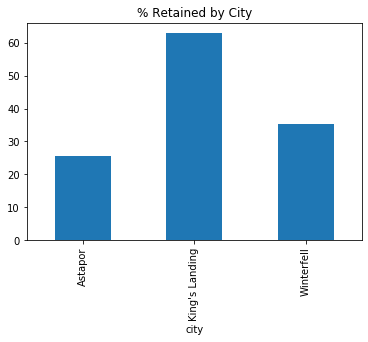

In [17]:
#_ = by_city.iloc[:, by_city.columns.get_level_values(1).isin({'<lambda_0>'})].plot(kind='bar', legend=False, title="Retention by City")
# retention by city:
warnings.simplefilter(action="ignore", category=FutureWarning)
_=df.groupby(['city'])['retained'].agg({'total users':'count',
                                      'retained users': 'sum',
                                      '% retained': lambda x: round(100*x.sum()/x.count(),1)}).plot(kind='bar', y='% retained',legend=False)
_=plt.title('% Retained by City')

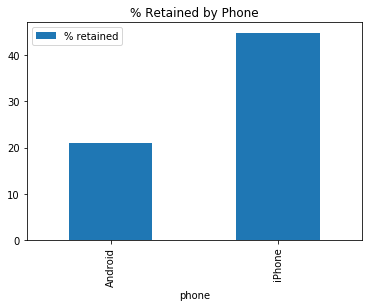

In [18]:
# retention by city:
warnings.simplefilter(action="ignore", category=FutureWarning)
_=df.groupby(['phone'])['retained'].agg({'total users':'count',
                                      'retained users': 'sum',
                                      '% retained': lambda x: round(100*x.sum()/x.count(),1)}).plot(kind='bar', y='% retained',legend='False')
_=plt.title('% Retained by Phone')

# Predictive Modelling

## Random Forest

In [19]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
df1 = df.drop(columns=['signup_date','last_trip_date'])
df1.city = df1.city.apply(lambda x: x.replace("Astapor", "1").replace("King's Landing", "2").replace("Winterfell", "3"))
df1=df1.drop(df1.index[df1.phone.isnull()])
df1.phone=df1.phone.apply(lambda x: x.replace("Android", "1").replace("iPhone", "2"))
df1=df1.drop(df1.index[df1.avg_rating_of_driver.isnull()])
df1=df1.drop(df1.index[df1.avg_rating_by_driver.isnull()])


X=df1.iloc[:,:-1].values.astype(np.float)
y=df1.retained.values.astype(np.int)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, random_state=42)

y_pred = rf.fit(X_train,y_train).predict(X_test)

In [20]:
# fine-tune hyperparameters:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 50, 100]
             ,'max_depth': [3, 7, 11]
             ,'min_samples_split': [2, 5]
             ,'min_samples_leaf': [1, 3]
             ,'min_weight_fraction_leaf': [0, 0.25]} 

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc') 
rf_cv.fit(X, y) 
rf_cv.best_params_

{'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 100}

In [21]:
rf_cv.best_score_

0.8495859489710018

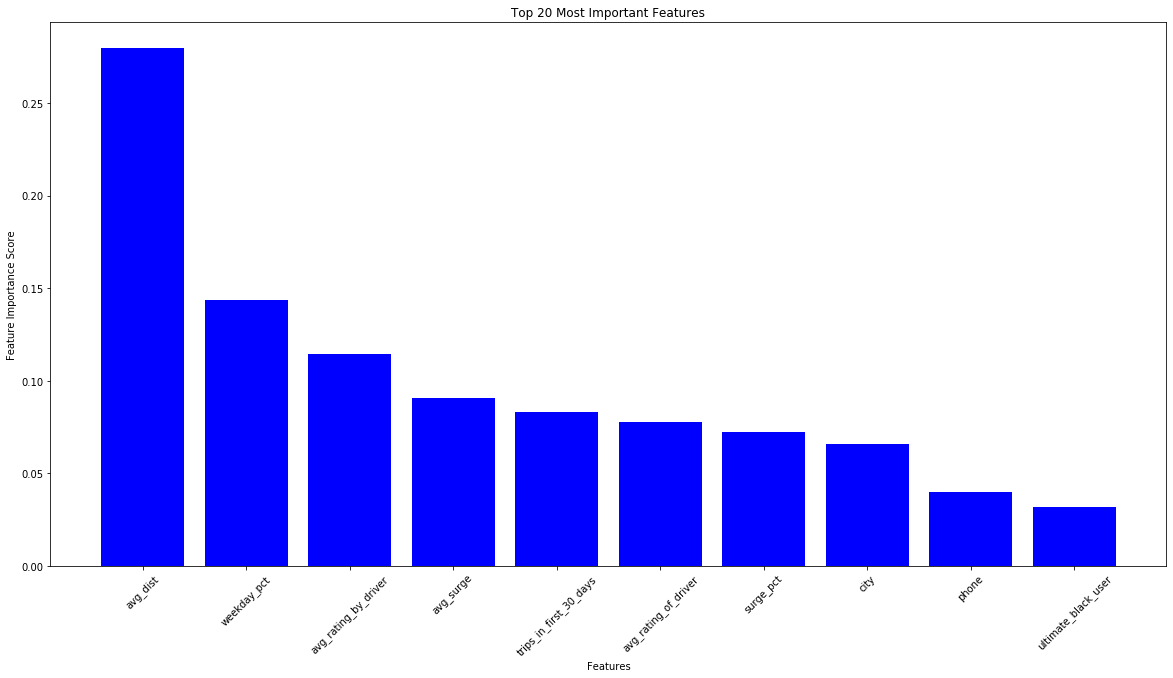

In [27]:
# feature importances:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

rf.fit(X, y) 
zipped = zip(df1.iloc[:,:-1].columns,rf.feature_importances_)
res = sorted(zipped, key = lambda x: x[1], reverse=True)
_ = plt.figure(figsize=(20,10))
for i in res[0:20]:
    _ = plt.bar(i[0],i[1], color='blue')
    _ = plt.title('Top 20 Most Important Features')
    _ = plt.xlabel('Features')
    _ = plt.xticks(rotation=45)
    _ = plt.ylabel('Feature Importance Score')
plt.savefig('FI-RF.jpg')

In [34]:
from sklearn import metrics
from sklearn.metrics import classification_report

def evaluate_model(xtest, ytest, clf):
    """ 
    This function evaluates the effectiveness of a ML model and outputs F1 Scores, AUC score and Confusion Matrix
    """
    # Make predictions for Xtest
    y_pred = clf.predict(xtest)
    
    # Confusion matrix
    cm = metrics.confusion_matrix(ytest, y_pred)
    
    print(classification_report(ytest, y_pred))
    print('\nConfusion Matrix:\n', cm)

In [35]:
evaluate_model(X_test, y_test, rf)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7293
           1       0.99      0.96      0.98      5141

    accuracy                           0.98     12434
   macro avg       0.98      0.98      0.98     12434
weighted avg       0.98      0.98      0.98     12434


Confusion Matrix:
 [[7244   49]
 [ 200 4941]]


## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression 
 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [24]:
# fine-tune hyperparameters:

param_grid = {'normalize': [True, False]
             ,'n_jobs': [None, 5, 10]} 

reg_all = LinearRegression()
reg_cv = GridSearchCV(reg_all, param_grid, cv=5, scoring='roc_auc') 
reg_cv.fit(X, y) 
reg_cv.best_params_

{'n_jobs': None, 'normalize': True}

In [25]:
reg_cv.best_score_

0.7138197298411696